#EVALUACION

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

📊 Evaluación del modelo: Regresión Logística
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4000
           1       0.76      0.65      0.70      4004

    accuracy                           0.72      8004
   macro avg       0.73      0.72      0.72      8004
weighted avg       0.73      0.72      0.72      8004

F1 Score     : 0.7009
Precision    : 0.7586
Recall       : 0.6513
ROC AUC      : 0.7968

📊 Evaluación del modelo: Red Neuronal
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      4000
           1       0.79      0.69      0.73      4004

    accuracy                           0.75      8004
   macro avg       0.75      0.75      0.75      8004
weighted avg       0.75      0.75      0.75      8004

F1 Score     : 0.7320
Precision    : 0.7856
Recall       : 0.6853
ROC AUC      : 0.8229


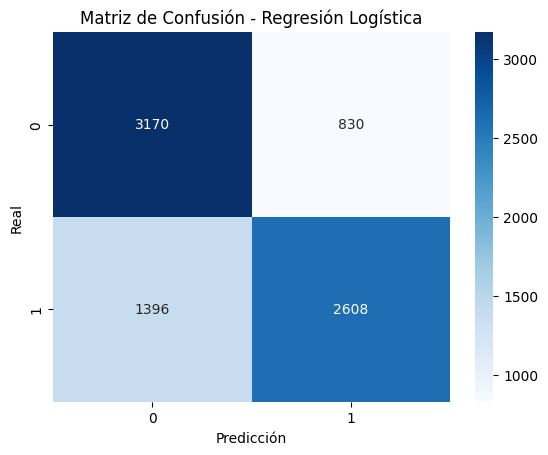

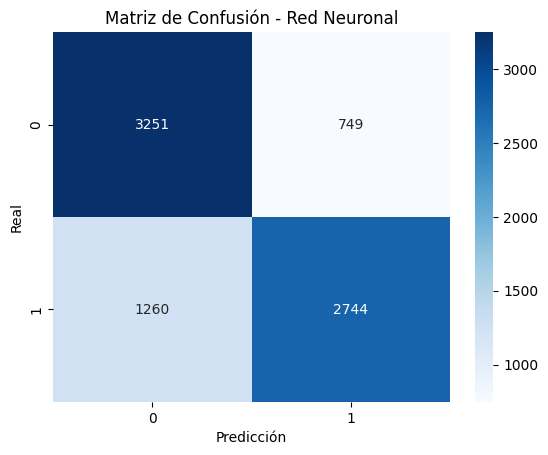

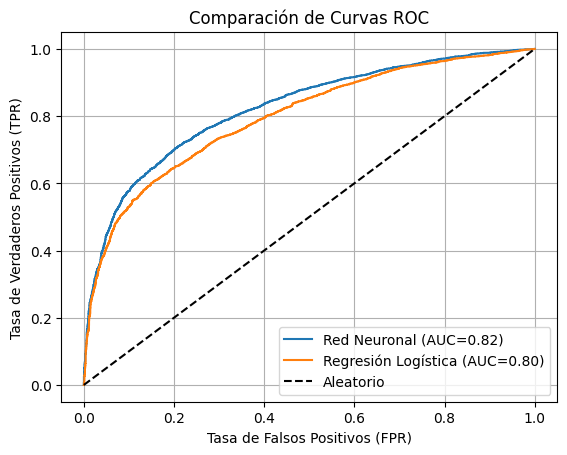

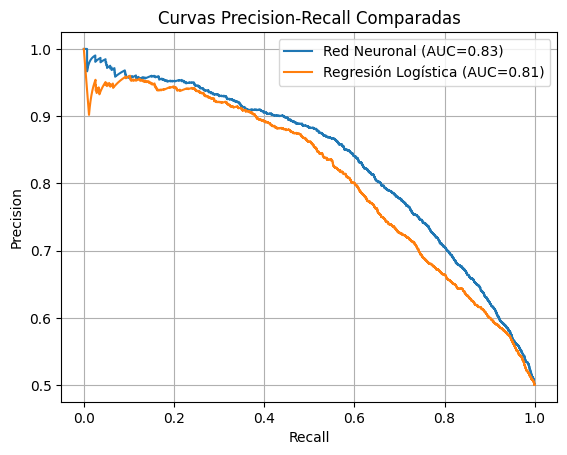

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.785571,0.685315,0.732026,0.822855
1,Regresión Logística,0.758581,0.651349,0.700887,0.796762


In [14]:
### 🔧 TAREA
# Compara el desempeño de la red neuronal con la regresión logística. Analiza sus métricas, curva ROC y precisión vs. recall.

import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# 🔧 Cargar configuración
config = train.load_config("/content/DeepNeuralNetworkUSS/Projects/Credit/config.yaml")

# 📦 Cargar y preparar los datos
X, y = train.load_data("/content/DeepNeuralNetworkUSS/Projects/Credit/data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

# 🧪 Entrenar modelo base (Regresión Logística)
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)

# 🔍 Predicciones del modelo base
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

# 📥 Cargar modelo entrenado Red Neuronal
from tensorflow.keras.models import load_model
nn_model = load_model("/content/DeepNeuralNetworkUSS/Projects/Credit/models/nn_model.keras")

# 🔍 Predicciones de Red Neuronal
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn, threshold=0.5)

# 📊 Evaluación individual
ev.evaluate_model(y_test, y_pred_log, y_proba_log, model_name="Regresión Logística")
ev.evaluate_model(y_test, y_pred_nn, y_proba_nn, model_name="Red Neuronal")

# 🧱 Matrices de Confusión
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

# 📈 Comparación de curvas ROC
ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log,
                       label1="Red Neuronal", label2="Regresión Logística")

# 🔍 Comparación de curvas Precision-Recall
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log,
                                 label1="Red Neuronal", label2="Regresión Logística")

# 📋 Comparación de métricas en tabla
df_metrics = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal",
    model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(df_metrics)

### 📊 Pregunta de reflexión
#¿En qué umbral se maximiza el F1-score para cada modelo? ¿Te parece razonable utilizar 0.5 como punto de corte en este contexto?
#Sí, es razonable como punto de partida, pero no necesariamente óptimo. El F1-score podría mejorar si se ajusta el umbral. Por ejemplo, si el objetivo es reducir falsos negativos (mayor recall), podrías bajar el umbral. Si prefieres reducir falsos positivos (mayor precisión), podrías subirlo.

#¿Es uno de los modelos más conservador o arriesgado que el otro?
#Red Neuronal:
  #Mayor precisión y recall que la regresión logística.
  #Mejor F1-score y AUC.
  #Más equilibrada: clasifica mejor tanto positivos como negativos.

#Regresión Logística:
  #Menor recall → más conservadora: clasifica menos positivos, evita falsos positivos.
  #Menor precisión que la red neuronal, menos efectiva en este caso.

#La regresión logística es más conservadora, mientras que la red neuronal es más arriesgada pero más efectiva, logrando mejor balance entre precisión y recall.